In [15]:
import pandas as pd

In [14]:
# Predict on a Pandas DataFrame.
loaded_model.predict(pd.DataFrame(img))

2023/12/07 14:41:26 WARNING mlflow.pyfunc: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.8.1, required: mlflow==2.9.0)
 - cloudpickle (current: 2.2.1, required: cloudpickle==3.0.0)
 - ipython (current: 8.12.2, required: ipython==8.18.1)
 - matplotlib (current: 3.7.3, required: matplotlib==3.8.2)
 - numpy (current: 1.24.4, required: numpy==1.26.2)
 - opencv-python (current: 4.6.0, required: opencv-python==4.8.1.78)
 - packaging (current: 23.1, required: packaging==23.2)
 - pandas (current: 2.0.3, required: pandas==2.1.3)
 - psutil (current: 5.9.5, required: psutil==5.9.6)
 - thop (current: uninstalled, required: thop==0.1.1-2209072238)
 - tqdm (current: 4.65.0, required: tqdm==4.66.1)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
2023/12/07 14:41:26 WARNING mlflow.pyfunc: The version o

ValueError: DataFrame constructor not properly called!

In [23]:
import mlflow
logged_model = 'runs:/38b3518df2344a1f982f09d6e71f63a2/runs/Model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)


2023/12/07 14:50:43 WARNING mlflow.pyfunc: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.8.1, required: mlflow==2.9.0)
 - cloudpickle (current: 2.2.1, required: cloudpickle==3.0.0)
 - ipython (current: 8.12.2, required: ipython==8.18.1)
 - matplotlib (current: 3.7.3, required: matplotlib==3.8.2)
 - numpy (current: 1.24.4, required: numpy==1.26.2)
 - opencv-python (current: 4.6.0, required: opencv-python==4.8.1.78)
 - packaging (current: 23.1, required: packaging==23.2)
 - pandas (current: 2.0.3, required: pandas==2.1.3)
 - psutil (current: 5.9.5, required: psutil==5.9.6)
 - thop (current: uninstalled, required: thop==0.1.1-2209072238)
 - tqdm (current: 4.65.0, required: tqdm==4.66.1)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
2023/12/07 14:50:43 WARNING mlflow.pyfunc: The version o

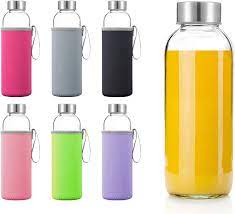

In [19]:
from PIL import Image

img = Image.open("Untitled.jpeg")
img

In [20]:
import torch
from torchvision import transforms
convert_tensor = transforms.ToTensor()
convert_tensor(img).shape

torch.Size([3, 214, 235])

In [21]:
# Define the transformation
data_transform = transforms.Compose([
    transforms.Resize((640, 640)),
    transforms.ToTensor(),  # Converts the image to a tensor with values in the range [0, 1]
])

# Apply the transformation
tensor_image = data_transform(img)

tensor_image = (tensor_image * 255).byte()

# Add batch dimension
tensor_image = tensor_image.unsqueeze(0)

# Ensure the tensor is of type uint8 and has the correct shape
assert tensor_image.dtype == torch.uint8
assert tensor_image.shape == torch.Size([1, 3, 640, 640])

# Display the tensor shape
print(tensor_image.shape)

torch.Size([1, 3, 640, 640])


In [24]:
loaded_model.predict(tensor_image)

MlflowException: This model contains a tensor-based model signature with no input names, which suggests a numpy array input or a pandas dataframe input with proper column values, but an input of type <class 'torch.Tensor'> was found.

In [1]:
import mlflow
from ultralytics import YOLO
import torch


mlflow.set_tracking_uri("http://13.43.219.126:8080")

In [2]:
torch.cuda.is_available()

True

In [3]:
!yolo setting datasets_dir=$PWD

💡 Learn about settings at https://docs.ultralytics.com/quickstart/#ultralytics-settings
Printing '/home/coena98/.config/Ultralytics/settings.yaml'

settings_version: 0.0.4
datasets_dir: /home/coena98/bottle_recognition
weights_dir: weights
runs_dir: runs
uuid: 1ec19f3fc54af313a146e743714a99b29633d7d90519346de20ffc8a09a3a474
sync: true
api_key: ''
clearml: true
comet: true
dvc: true
hub: true
mlflow: true
neptune: true
raytune: true
tensorboard: true
wandb: true



In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="llgtjSRbLz3hdjjaUEfb")
project = rf.workspace("erkan-unal").project("detect-o9dby")


dataset = project.version(1).download("yolov8")



loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.219, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to detect-1 in yolov8:: 100%|█| 29430/29430 [00:0


In [5]:
!sed -i "s/detect-1/../g" detect-1/data.yaml

In [6]:
model = YOLO('yolov8n.pt')

In [7]:
dataset_yaml = dataset.location+'/data.yaml'


In [8]:
with mlflow.start_run() as run: 
    model.train(data=dataset_yaml, epochs=1, imgsz=640, device=0, batch=8)
    
    mlflow.pyfunc.log_model(
        artifact_path='runs/detect/train/weights',
        conda_env='conda.yaml',
        loader_module=dataset_yaml,
        input_example='/home/coena98/bottle_recognition/Untitled.jpeg'
    )
    
    print(run.info.run_id)

New https://pypi.org/project/ultralytics/8.0.222 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.219 🚀 Python-3.8.18 torch-2.1.1 CUDA:0 (NVIDIA GeForce RTX 3070 Ti Laptop GPU, 7974MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/coena98/bottle_recognition/detect-1/data.yaml, epochs=1, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_fr

train: Scanning /home/coena98/bottle_recognition/detect-1/train/labels... 10515 

train: WARNING ⚠️ /home/coena98/bottle_recognition/detect-1/train/images/02_03_2020_14_48_39_jpeg.rf.e4a248f5cb036571cb56bfb8c6923da2.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /home/coena98/bottle_recognition/detect-1/train/images/plasticbottle81_jpeg.rf.f7289a7e2c79a7fb20c5b977ad39e5c6.jpg: 1 duplicate labels removed


train: New cache created: /home/coena98/bottle_recognition/detect-1/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4094, len(boxes) = 11605. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: Scanning /home/coena98/bottle_recognition/detect-1/valid/labels... 2557 ima

val: New cache created: /home/coena98/bottle_recognition/detect-1/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1186, len(boxes) = 2752. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)


2023/12/06 16:37:07 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.


MLflow: logging run_id(daa2a35054a44374b2253b4b9ba8f0d5) to http://13.43.219.126:8080
MLflow: disable with 'yolo settings mlflow=False'
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.24G      1.151      2.326      1.494          5        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       2557       2752      0.367      0.402      0.348      0.191

1 epochs completed in 0.024 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.219 🚀 Python-3.8.18 torch-2.1.1 CUDA:0 (NVIDIA GeForce RTX 3070 Ti Laptop GPU, 7974MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       2557       2752      0.366      0.402      0.348      0.191
          glass-bottle       2557       1526      0.358      0.474      0.418      0.233
        plastic-bottle       2557       1226      0.375       0.33      0.278      0.149
Speed: 0.2ms preprocess, 1.4ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/train
MLflow: results logged to http://13.43.219.126:8080
MLflow: disable with 'yolo settings mlflow=False'
daa2a35054a44374b2253b4b9ba8f0d5


In [9]:
run_id=run.info.run_id
run.info


<RunInfo: artifact_uri='mlflow-artifacts:/0/daa2a35054a44374b2253b4b9ba8f0d5/artifacts', end_time=None, experiment_id='0', lifecycle_stage='active', run_id='daa2a35054a44374b2253b4b9ba8f0d5', run_name='hilarious-cow-440', run_uuid='daa2a35054a44374b2253b4b9ba8f0d5', start_time=1701880618211, status='RUNNING', user_id='coena98'>

In [11]:
mlflow.pyfunc.log_model(
    artifact_path='runs/detect/train/weights',
    conda_env='conda.yaml',
    loader_module=dataset_yaml,
    input_example='/home/coena98/bottle_recognition/Untitled.jpeg'
)

Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
Setuptools is replacing distutils.


In [13]:
dataset_yaml

'/home/coena98/bottle_recognition/detect-1/data.yaml'

In [12]:
import mlflow
logged_model = 'runs:/81a93a9626d147faa7264237aabd464d/runs/detect/train/weights'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)


ModuleNotFoundError: No module named '/home/coena98/bottle_recognition/detect-1/data'

In [11]:
model_best = YOLO('runs/detect/train/weights/best.pt')

In [ ]:
mlflow.pyfunc.log_model(artifact_path='runs/detect/train/weights',conda_env='conda.yaml',loader_module=dataset_yaml,input_example='/home/coena98/bottle_recognition/Untitled.jpeg')

In [ ]:
model.predict('Untitled.jpeg', save=True)

In [ ]:
print(model)


In [ ]:
import pickle
filename = '/runs/detect/train/weights/best.pt'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
first_parameter = next(model.parameters())
input_shape = first_parameter.size()
first_parameter

In [ ]:
first_parameter.size()

In [ ]:
# Get the X_train data
X_train = model.model.model[-1] # This is the last layer of the model, which is the output layer

# Print the shape of the X_train data
print(X_train.shape)

In [ ]:
# Get the input schema
input_schema = model.model.model[-1].shape

# Get the output schema
output_schema = model.model.model[-1].shape

print(f"Input schema: {input_schema}")
print(f"Output schema: {output_schema}")

In [ ]:
from mlflow.models.signature import ModelSignature
from mlflow.types.schema import Schema, ColSpec
input_schema = Schema([
    ColSpec("image", "tensor", size=[3, 640, 640]),  # Channels, Height, Width
])

# Define the output schema
output_schema = Schema([
    ColSpec("bounding_boxes", "tensor", shape=[None, 6]),  # Batch size, Attributes per bounding box
])

# Create the model signature
signature = ModelSignature(inputs=input_schema, outputs=output_schema)

In [ ]:
import numpy as np
from mlflow.models import ModelSignature, infer_signature
from mlflow.types.schema import Schema, TensorSpec
input_schema = Schema(
    [
        TensorSpec(np.dtype(np.float64), (-1, 640, 640, 3)),
    ]
)

output_schema = Schema([TensorSpec(np.dtype(np.float32), (-1, 10))])

signature = ModelSignature(inputs=input_schema, outputs=output_schema)

In [ ]:
signature


In [ ]:
model.model.model[-1]

In [ ]:
with mlflow.start_run.ipynb_checkpoints/:
    mlflowpy.pytorch.log_model(model, "model", signature=signature)

In [ ]:
run.to_dictionary()

In [ ]:
pytorch_model = mlflow.pytorch.load_model("runs:/" + run_id + "/" + model_path_dir)

In [ ]:
#https://mlflow.org/docs/latest/python_api/mlflow.pytorch.html#mlflow.pytorch.log_model

In [ ]:
from mlflow.models import infer_signature

In [ ]:
from mlflow.models import infer_signature
from mlflow.utils.environment import _mlflow_conda_env

In [ ]:
# Conda environment
custom_env =_mlflow_conda_env(
    additional_conda_deps=None,
    additional_pip_deps=None,
    additional_conda_channels=None,
)

In [ ]:
# Log the model manually
mlflow.xgboost.log_model(model, 
                         artifact_path="classifier", 
                         conda_env=custom_env,
                         signature=signature,
                         )

In [ ]:
model.predict('/home/coena98/bottle_recognition/detect-1/valid/images/',stream=True)

In [ ]:
signature = infer_signature(model_output=model.predict('Untitled.jpeg', save=True))

In [ ]:
signature 

In [ ]:
mlflow.

In [ ]:
# Option 1: Manually construct the signature object
input_schema = Schema(
    [
        UltraSpec(np.dtype(np.float64), (3, 16, 3, 2)),
    ]
)
output_schema = Schema([TensorSpec(np.dtype(np.float32), (-1, 10))])
signature = ModelSignature(inputs=input_schema, outputs=output_schema)

In [ ]:
mlflow.pytorch.log_model(model, "yolov8_model")


In [ ]:
from pprint import pprint

pprint(model)

In [ ]:
#mlflow.pytorch.get_default_conda_env()


In [ ]:
model_uri = f"runs:/{run.info.run_id}/model"
loaded_model = mlflow.pytorch.load_model(model_uri)